In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

We will now explore relationship between social learners and their opinions aggregated at the state level. I will examine vaccination rate(atleast one dose) as of april,23,2023 with social learner proportion. The data for vaccination rate was retrieved from https://www.statista.com/statistics/1202065/population-with-covid-vaccine-by-state-us/. 

In [39]:
vaccine_df = pd.read_csv('vaccines.csv')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           59 non-null     object 
 1   vaccine_1_dose  59 non-null     float64
 2   Vaccine_rate    59 non-null     float64
 3   State Code      59 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [40]:
vaccine_df = vaccine_df.rename(columns={"State Code": "Code"})
vaccine_df.drop(columns=['State ','vaccine_1_dose'],inplace=True)
vaccine_df.head()

,Vaccine_rate,Code
0,0.95,RI
1,0.95,AS
2,0.95,DC
3,0.95,MA
4,0.95,VT


In [41]:
vaccine_df.describe()

,Vaccine_rate
count,59.000000
mean,0.799068
std,0.116171
min,0.573000
25%,0.697500
50%,0.791000
75%,0.911500
max,0.950000


In [42]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df.head()

,State,Index
0,HI,91
1,LA,72
2,SC,70
3,MS,64
4,MD,63


In [43]:
collective_df.tail()

,State,Index
45,SD,36
46,WY,35
47,NE,35
48,OR,33
49,MT,31


In [44]:
collective_df.describe()

,Index
count,50.000000
mean,50.080000
std,11.336846
min,31.000000
25%,42.000000
50%,49.500000
75%,56.750000
max,91.000000


In [45]:
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    50 non-null     object
 1   Index   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


**Index** - Social Learner Index: a higher value represents higher value of collectivism.  
**Vaccine_rate** - atleast 1 dose COVID vaccine registered to the said proportion of the state population.  

In [46]:
merged_df = collective_df.merge(vaccine_df,on='Code',how='outer')
merged_df = merged_df[~merged_df.Index.isna()]
merged_df

,Code,Index,Vaccine_rate
0,HI,91.0,0.916
1,LA,72.0,0.629
2,SC,70.0,0.712
3,MS,64.0,0.618
4,MD,63.0,0.920
5,UT,61.0,0.755
6,VA,60.0,0.913
7,GA,60.0,0.686
8,CA,60.0,0.850
9,NJ,59.0,0.949


In [47]:
# just dividing the social learner index by 100 instead of normalizing it.
merged_df.Index = merged_df.Index / 100
merged_df.head()

,Code,Index,Vaccine_rate
0,HI,0.91,0.916
1,LA,0.72,0.629
2,SC,0.70,0.712
3,MS,0.64,0.618
4,MD,0.63,0.920


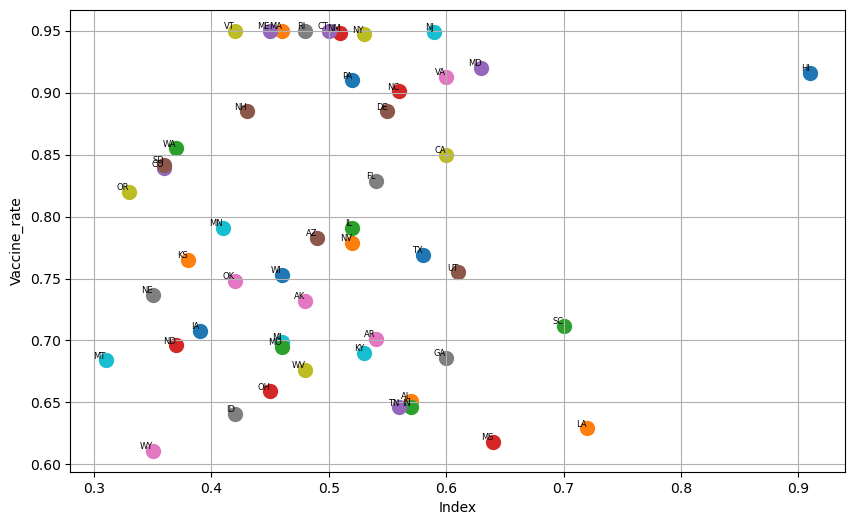

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['Vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['Vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('Vaccine_rate')



# Show the plot
plt.grid()

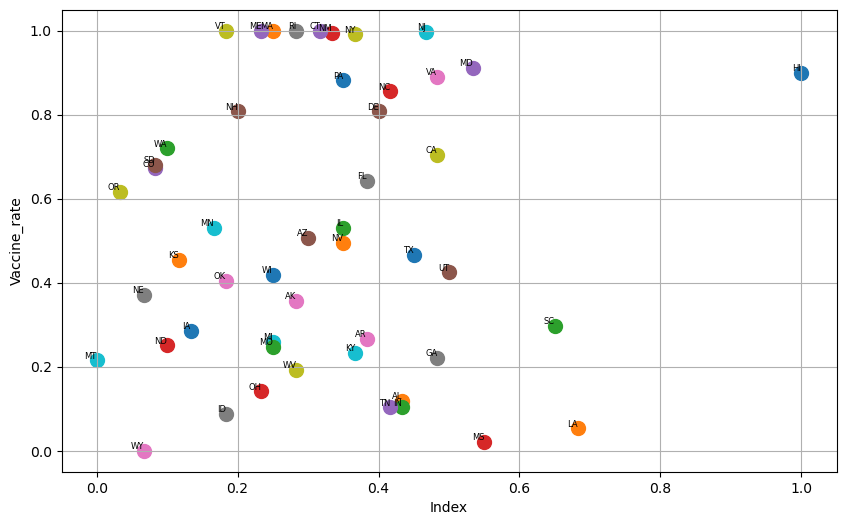

In [49]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Index' and 'Vaccine_rate' columns
# merged_df[['Index', 'Vaccine_rate']] = scaler.fit_transform(merged_df[['Index', 'Vaccine_rate']])
merged_df[['Index', 'Vaccine_rate']] = scaler.fit_transform(merged_df[['Index', 'Vaccine_rate']])
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['Vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['Vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('Vaccine_rate')



# Show the plot
plt.grid()

Experiments with full vaccine - percentage of people fully vaccinated

In [50]:
fullvaccine_df = pd.read_csv('full_vaccine.csv')
fullvaccine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State Code         59 non-null     object 
 1   vaccine            59 non-null     float64
 2   full_vaccine_rate  59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [51]:
fullvaccine_df.columns

Index(['State Code', 'vaccine', 'full_vaccine_rate'], dtype='object')

In [52]:
fullvaccine_df = fullvaccine_df.rename(columns={"State Code": "Code"})
fullvaccine_df.drop(columns='vaccine',inplace=True)
fullvaccine_df.head()


,Code,full_vaccine_rate
0,RI,0.880
1,AS,0.896
2,DC,0.912
3,MA,0.845
4,VT,0.860


In [53]:
merged_df = merged_df.merge(fullvaccine_df,on='Code',how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               50 non-null     object 
 1   Index              50 non-null     float64
 2   Vaccine_rate       50 non-null     float64
 3   full_vaccine_rate  50 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


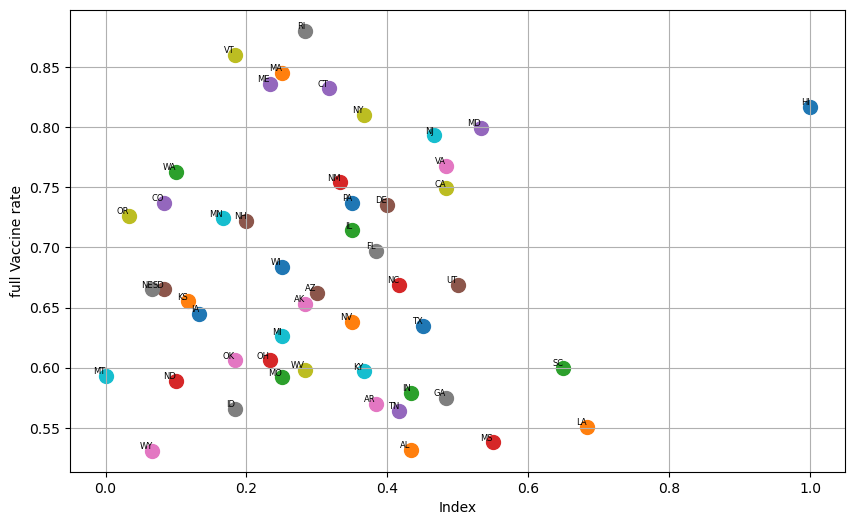

In [54]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['full_vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['full_vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('full Vaccine rate')



# Show the plot
plt.grid()

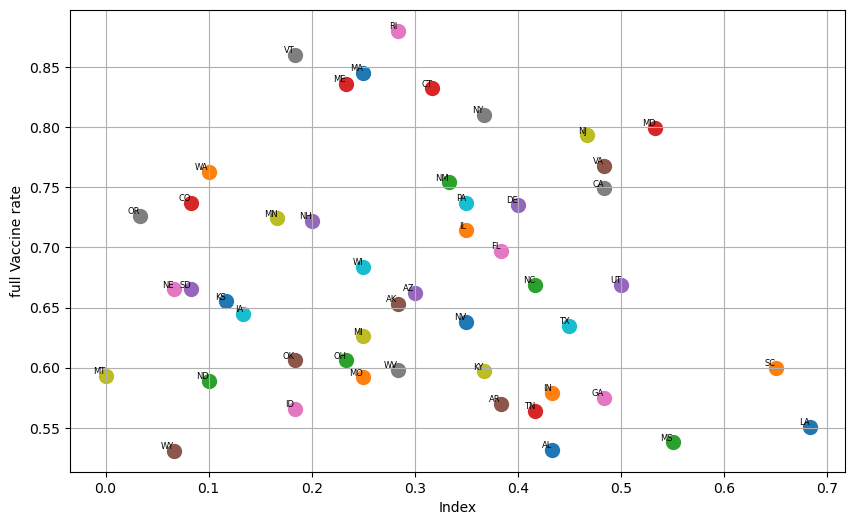

In [55]:
#removing Hawaii
merged_df = merged_df[merged_df.Code != 'HI']
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['full_vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['full_vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('full Vaccine rate')



# Show the plot
plt.grid()

In [56]:
prez_election_df = pd.read_csv('prez_rate.csv')
prez_election_df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'prez_rate.csv'

President vote rate is the proportion of people who voted for the president in the 2000 elections by state.

In [ ]:
prez_election_df.rename(columns={'State':'Code'}, inplace=True)
prez_election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            51 non-null     object 
 1   prez_vote_rate  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
merged_df = merged_df.merge(prez_election_df,how='outer',on='Code')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               51 non-null     object 
 1   Index              49 non-null     float64
 2   Vaccine_rate       49 non-null     float64
 3   full_vaccine_rate  49 non-null     float64
 4   prez_vote_rate     51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
merged_df[merged_df.Index.isna()]

,Code,Index,Vaccine_rate,full_vaccine_rate,prez_vote_rate
49,DC,NaN,NaN,NaN,0.090
50,HI,NaN,NaN,NaN,0.375


In [ ]:
merged_df = merged_df[~merged_df.Index.isna()]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               49 non-null     object 
 1   Index              49 non-null     float64
 2   Vaccine_rate       49 non-null     float64
 3   full_vaccine_rate  49 non-null     float64
 4   prez_vote_rate     49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


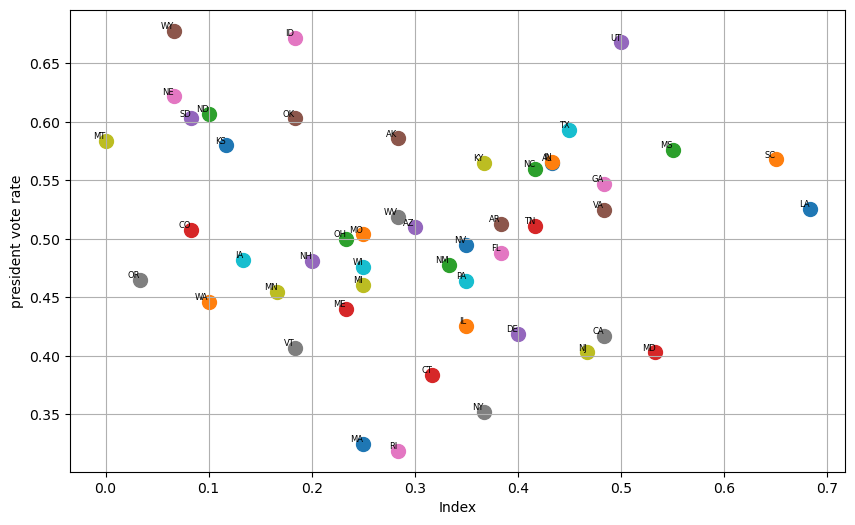

In [ ]:

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['prez_vote_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['prez_vote_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('president vote rate')



# Show the plot
plt.grid()

**Model Selection using BIC and different Regression models**

In [ ]:



# Extract the independent variable 'index' and the dependent variable 'vaccine_rate'
X =merged_df['Index']
y = merged_df['full_vaccine_rate']

# Create a DataFrame to store the results
results = []

# Linear Regression
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()
log_likelihood_linear = model_linear.llf
num_params_linear = model_linear.df_model + 1
bic_linear = -2 * log_likelihood_linear + num_params_linear * np.log(len(y))
results.append(('Linear Regression', bic_linear))

# Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
model_poly = sm.OLS(y, X_poly).fit()
log_likelihood_poly = model_poly.llf
num_params_poly = model_poly.df_model + 1
bic_poly = -2 * log_likelihood_poly + num_params_poly * np.log(len(y))
results.append(('Polynomial Regression (Degree 2)', bic_poly))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X.values.reshape(-1, 1), y)
y_pred_ridge = ridge.predict(X.values.reshape(-1, 1))
residuals_ridge = y - y_pred_ridge
log_likelihood_ridge = -0.5 * len(y) * np.log(np.mean(residuals_ridge**2))
num_params_ridge = 2  # Two parameters: intercept and slope
bic_ridge = -2 * log_likelihood_ridge + num_params_ridge * np.log(len(y))
results.append(('Ridge Regression', bic_ridge))

# Display BIC scores for all models
results_df = pd.DataFrame(results, columns=['Model', 'BIC'])
print(results_df)


                              Model         BIC
0                 Linear Regression  -84.775125
1  Polynomial Regression (Degree 2)  -84.682874
2                  Ridge Regression -223.753978


In [ ]:

X =merged_df['Index']
y = merged_df['prez_vote_rate']

# Create a DataFrame to store the results
results = []

# Linear Regression
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()
log_likelihood_linear = model_linear.llf
num_params_linear = model_linear.df_model + 1
bic_linear = -2 * log_likelihood_linear + num_params_linear * np.log(len(y))
results.append(('Linear Regression', bic_linear))

# Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
model_poly = sm.OLS(y, X_poly).fit()
log_likelihood_poly = model_poly.llf
num_params_poly = model_poly.df_model + 1
bic_poly = -2 * log_likelihood_poly + num_params_poly * np.log(len(y))
results.append(('Polynomial Regression (Degree 2)', bic_poly))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X.values.reshape(-1, 1), y)
y_pred_ridge = ridge.predict(X.values.reshape(-1, 1))
residuals_ridge = y - y_pred_ridge
log_likelihood_ridge = -0.5 * len(y) * np.log(np.mean(residuals_ridge**2))
num_params_ridge = 2  # Two parameters: intercept and slope
bic_ridge = -2 * log_likelihood_ridge + num_params_ridge * np.log(len(y))
results.append(('Ridge Regression', bic_ridge))

# Display BIC scores for all models
results_df = pd.DataFrame(results, columns=['Model', 'BIC'])
print(results_df)

                              Model         BIC
0                 Linear Regression  -95.103787
1  Polynomial Regression (Degree 2)  -97.381528
2                  Ridge Regression -234.065876


In [ ]:

yale_data = pd.read_csv('yale.csv')

In [ ]:
yale_data.columns

Index(['varname', 'GEOID', 'GeoName', 'GeoType', '2008', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [ ]:
yale_data.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403155 entries, 0 to 403154
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   varname  403155 non-null  object 
 1   GEOID    399687 non-null  float64
 2   GeoName  403155 non-null  object 
 3   GeoType  403155 non-null  object 
 4   2008     816 non-null     float64
 5   2010     816 non-null     float64
 6   2011     816 non-null     float64
 7   2012     816 non-null     float64
 8   2013     816 non-null     float64
 9   2014     102428 non-null  float64
 10  2015     816 non-null     float64
 11  2016     154889 non-null  float64
 12  2017     816 non-null     float64
 13  2018     255574 non-null  float64
 14  2019     264698 non-null  float64
 15  2020     273882 non-null  float64
 16  2021     273780 non-null  float64
dtypes: float64(14), object(3)
memory usage: 52.3+ MB


In [ ]:
prim = yale_data[yale_data.varname == 'human'][['GeoName','GeoType','varname','2008']]

In [ ]:
prim = prim[prim.GeoType =='State']

In [ ]:
prim = prim[~prim['2008'].isna()]

In [ ]:
state_alpha_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

prim['Code'] = prim['GeoName'].map(state_alpha_codes)


In [ ]:
prim.drop(columns=['GeoType','GeoName','varname'],inplace=True)


,2008,Code
459,50.394398,AL
460,52.484743,AK
461,53.667288,AZ
462,49.964435,AR
463,60.055803,CA
464,54.457770,CO
465,58.675920,CT
466,54.057243,DE
467,61.947808,DC
468,54.650366,FL


In [ ]:
prim['2008'] = prim['2008']/100
prim

,2008,Code
459,0.503944,AL
460,0.524847,AK
461,0.536673,AZ
462,0.499644,AR
463,0.600558,CA
464,0.544578,CO
465,0.586759,CT
466,0.540572,DE
467,0.619478,DC
468,0.546504,FL


In [62]:
merged_df = merged_df.merge(prim, how='outer',on='Code')

In [63]:
merged_df = merged_df[~merged_df.Index.isna()]

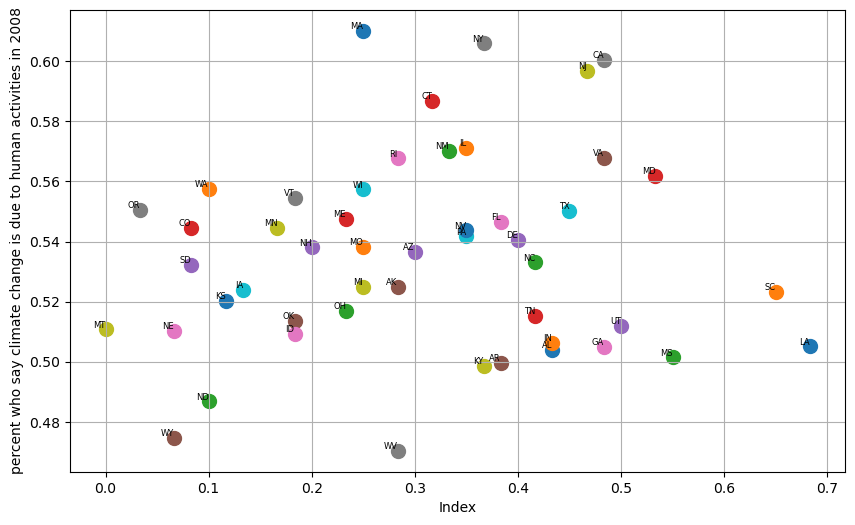

In [64]:

#human
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2008'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2008'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('percent who say climate change is due to human activities in 2008')



# Show the plot
plt.grid()


In [65]:
# human for 2021
prim = yale_data[yale_data.varname == 'human'][['GeoName','GeoType','varname','2021']]
prim = prim[prim.GeoType =='State']
prim = prim[~prim['2021'].isna()]
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim.drop(columns=['GeoType','GeoName','varname'],inplace=True)

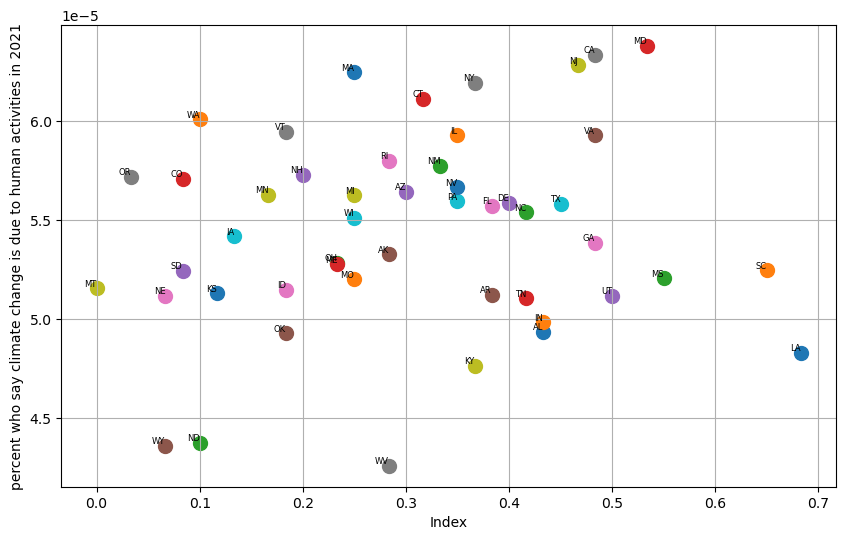

In [69]:
prim['2021'] = prim['2021']/100
merged_df = merged_df.merge(prim, how='outer',on='Code')
merged_df = merged_df[~merged_df.Index.isna()]

#human2021
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2021'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2021'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('percent who say climate change is due to human activities in 2021')



# Show the plot
plt.grid()

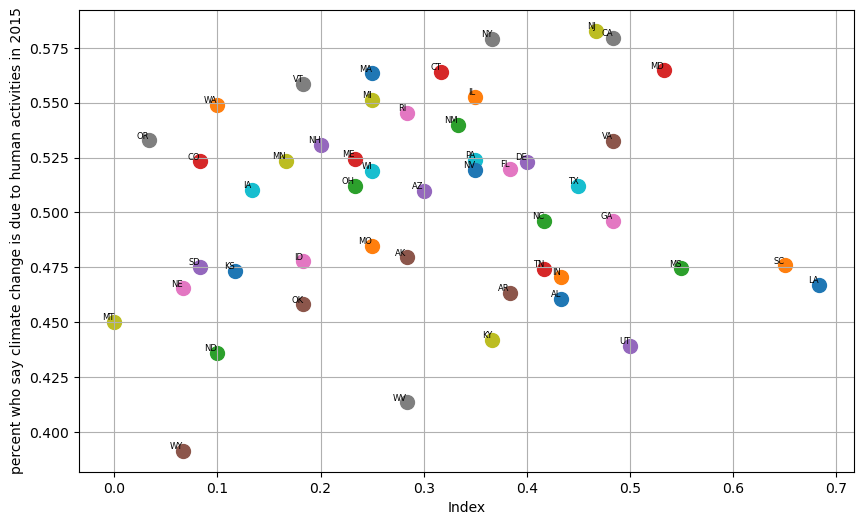

In [70]:
#human 2015
prim = yale_data[yale_data.varname == 'human'][['GeoName','GeoType','varname','2015']]
prim = prim[prim.GeoType =='State']
prim = prim[~prim['2015'].isna()]
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim.drop(columns=['GeoType','GeoName','varname'],inplace=True)
prim['2015'] = prim['2015']/100
merged_df = merged_df.merge(prim, how='outer',on='Code')
merged_df = merged_df[~merged_df.Index.isna()]

#human2021
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2015'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2015'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('percent who say climate change is due to human activities in 2015')



# Show the plot
plt.grid()

In [74]:
#consenus- Estimated percentage who believe that most scientists think global warming is happening			
#prim = yale_data[yale_data.varname == 'human'][['GeoName','GeoType','varname','2015']]		
prim = yale_data[(yale_data.varname == 'consensus') & (yale_data.GeoType == 'State')]

In [76]:
prim = prim[~prim['2008'].isna()][['GeoName','2008']]
prim

,GeoName,2008
51,Alabama,35.067285
52,Alaska,48.020057
53,Arizona,44.139304
54,Arkansas,37.270972
55,California,51.654453
56,Colorado,47.246982
57,Connecticut,49.365551
58,Delaware,44.327715
59,District of Columbia,55.826973
60,Florida,44.530867


In [79]:
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim['2008_consensus'] = prim['2008']/100
prim.drop(columns='2008',inplace=True)

In [84]:
prim.drop(columns='GeoName',inplace=True)

KeyError: "['2021_x' '2021_y' 'GeoName_x' '2008_consensus_x' 'GeoName_y'\n '2008_consensus_y' '2008_consensus'] not found in axis"

In [88]:

merged_df = merged_df.merge(prim, on='Code',how='outer')
merged_df
merged_df = merged_df[~merged_df.Index.isna()]

# #consensus2008
# plt.figure(figsize=(10, 6))  # Set the figure size

# # Scatter plot with country names as labels
# for i, row in merged_df.iterrows():
#     plt.scatter(row['Index'], row['2008_consensus'], label=row['Code'],s = 100)
#     plt.text(row['Index'], row['2008_consensus'], row['Code'], fontsize=6, ha='right', va='bottom')

# # Label axes
# plt.xlabel('Index')
# plt.ylabel('percentage who believe that most scientists think global warming is happening in 2008')



# # Show the plot
# plt.grid()


/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_2005/3493209623.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2008_consensus_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(prim, on='Code',how='outer')


KeyError: '2008_consensus'

<Figure size 1000x600 with 0 Axes>

In [104]:
merged_df.columns

Index(['Code', 'Index', 'Vaccine_rate', 'full_vaccine_rate', '2008', '2021',
       '2015'],
      dtype='object')

In [106]:
merged_df = merged_df.merge(prim, on='Code',how='outer')
merged_df = merged_df[~merged_df.Index.isna()]
merged_df.columns

Index(['Code', 'Index', 'Vaccine_rate', 'full_vaccine_rate', '2008', '2021',
       '2015', '2008_consensus'],
      dtype='object')

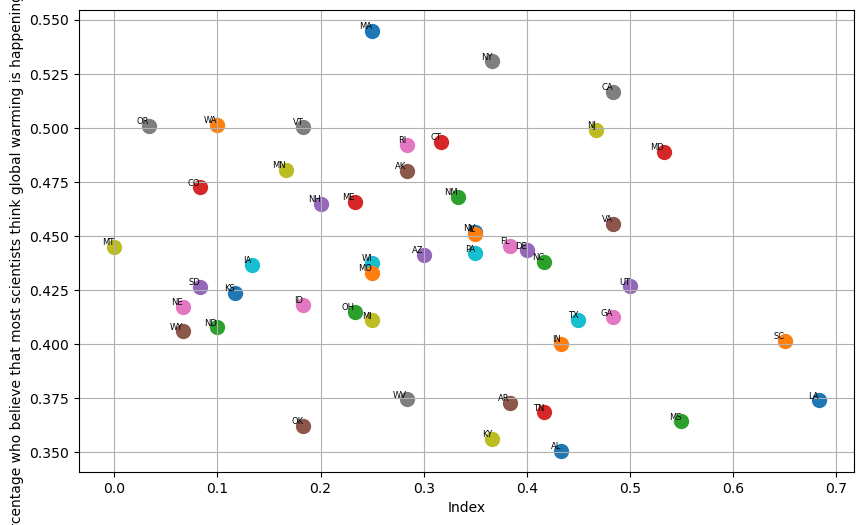

In [108]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2008_consensus'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2008_consensus'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('percentage who believe that most scientists think global warming is happening in 2008')



# Show the plot
plt.grid()

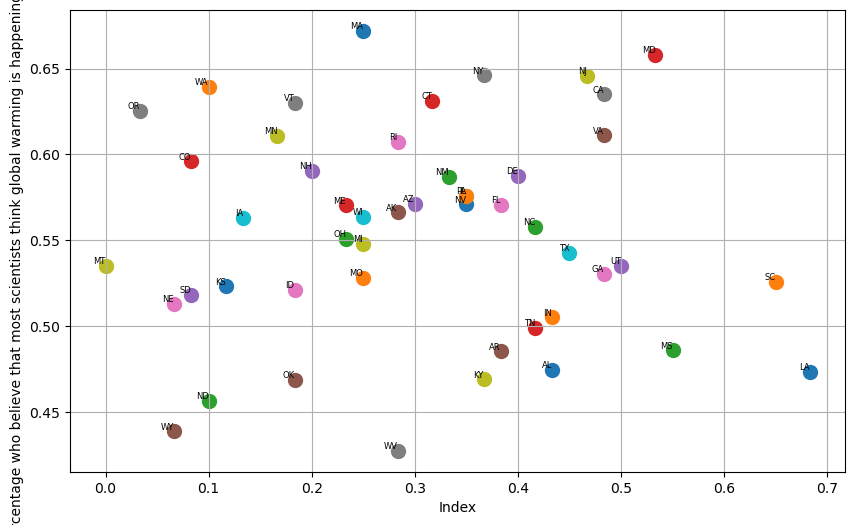

In [109]:

#2021 consensus
prim = yale_data[(yale_data.varname == 'consensus') & (yale_data.GeoType == 'State')]
prim = prim[~prim['2021'].isna()][['GeoName','2021']]
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim['2021_consensus'] = prim['2021']/100
prim.drop(columns='2021',inplace=True)
prim.drop(columns='GeoName',inplace=True)

merged_df = merged_df.merge(prim, on='Code',how='outer')
merged_df
merged_df = merged_df[~merged_df.Index.isna()]

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2021_consensus'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2021_consensus'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('percentage who believe that most scientists think global warming is happening in 2021')



# Show the plot
plt.grid()


,varname,GEOID,GeoName,GeoType,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
816,affectweather,NaN,Alabama,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,affectweather,NaN,Alaska,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,affectweather,NaN,Arizona,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,affectweather,NaN,Arkansas,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,affectweather,NaN,California,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247634,affectweather,51.0,Virginia,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.002,62.137,66.109,67.307
247635,affectweather,53.0,Washington,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.690,62.799,67.365,69.414
247636,affectweather,54.0,West Virginia,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.352,44.491,48.905,49.264
247637,affectweather,55.0,Wisconsin,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.478,58.734,62.473,63.334


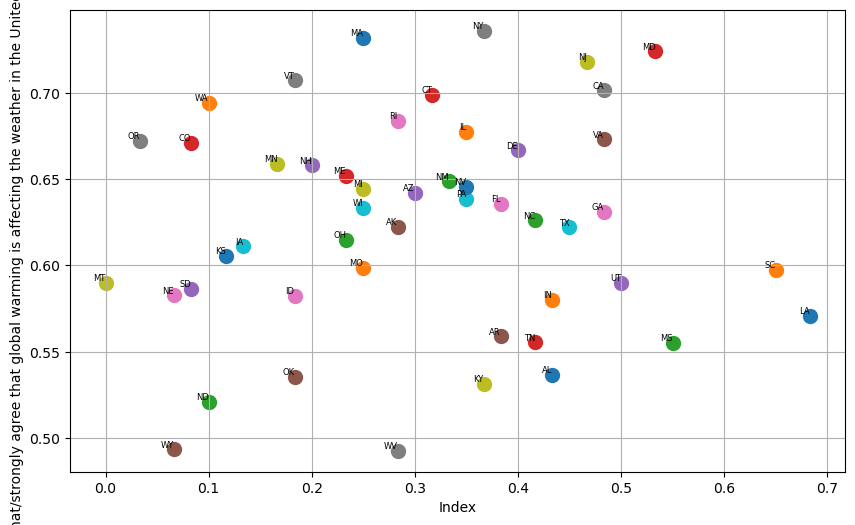

In [127]:
#missing until 2017
#2018 data and 2021 affectweather - Estimated percentage who somewhat/strongly agree that global warming is affecting the weather in the United States
prim = yale_data[(yale_data.varname == 'affectweather') & (yale_data.GeoType == 'State')]
prim = prim[~prim['2021'].isna()][['GeoName','2021','2018']]
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim['2021_affectweather'] = prim['2021']/100
prim['2018_affectweather'] = prim['2018']/100
prim.drop(columns='2021',inplace=True)
prim.drop(columns='2018',inplace=True)
prim.drop(columns='GeoName',inplace=True)	

merged_df = merged_df.merge(prim, on='Code',how='outer')
merged_df
merged_df = merged_df[~merged_df.Index.isna()]

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2021_affectweather'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2021_affectweather'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('somewhat/strongly agree that global warming is affecting the weather in the United States 2021')



# Show the plot
plt.grid()



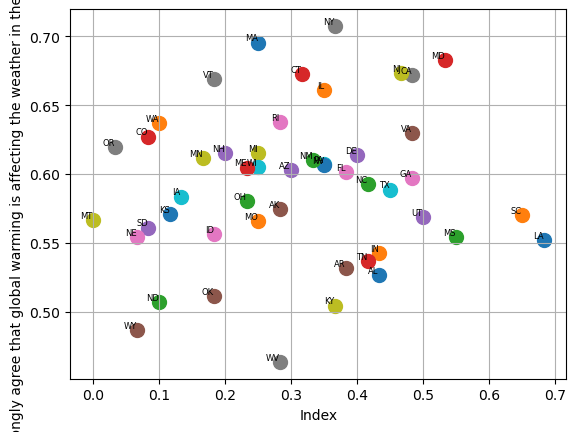

In [128]:


# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['2018_affectweather'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['2018_affectweather'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('somewhat/strongly agree that global warming is affecting the weather in the United States 2018')



# Show the plot
plt.grid()